## 2022~2023년 지역별 청약 경쟁률

In [48]:
import pandas as pd
import numpy as np

data=pd.read_csv('청약경쟁률.csv')
print(data.columns)
print(data.head())

Index(['연월', '시도', '특별공급 공급세대수', '특별공급 접수건수', '특별공급 경쟁률', '일반공급 공급세대수',
       '일반공급 접수건수', '일반공급 경쟁률'],
      dtype='object')
       연월  시도  특별공급 공급세대수  특별공급 접수건수 특별공급 경쟁률  일반공급 공급세대수  일반공급 접수건수  일반공급 경쟁률
0  Jan-22  서울          32       9203   287.59         295      10157     34.43
1  Feb-22  서울         176      21041   119.55         247      13380     54.17
2  Mar-22  서울         113       5359    47.42         346       4712     13.62
3  Apr-22  서울         131       9691    73.98         298       8080     27.11
4  May-22  서울          48        536    11.17          41        492     12.00


In [49]:
df=pd.DataFrame(data)
df

,연월,시도,특별공급 공급세대수,특별공급 접수건수,특별공급 경쟁률,일반공급 공급세대수,일반공급 접수건수,일반공급 경쟁률
0,Jan-22,서울,32,9203,287.59,295,10157,34.43
1,Feb-22,서울,176,21041,119.55,247,13380,54.17
2,Mar-22,서울,113,5359,47.42,346,4712,13.62
3,Apr-22,서울,131,9691,73.98,298,8080,27.11
4,May-22,서울,48,536,11.17,41,492,12.00
...,...,...,...,...,...,...,...,...
206,May-23,제주,0,0,0,136,16,0.12
207,Jun-23,제주,0,0,0,425,115,0.27
208,Feb-22,세종,526,21576,41.02,104,84007,807.76
209,Mar-22,세종,127,43830,345.12,72,98073,1362.13


In [50]:
# 지역 기준 그룹화
grouped = df.groupby('시도')
ratio = grouped['일반공급 경쟁률'].mean()
ratio

시도
강원     11.079000
경기      9.749444
경남     12.443077
경북      7.808333
광주      5.983846
대구      0.766923
대전     10.455000
부산     27.807857
서울     38.207857
세종    723.990000
울산      1.505000
인천      9.593529
전남      2.852500
전북      2.745833
제주      2.340000
충남      4.009375
충북      9.143571
Name: 일반공급 경쟁률, dtype: float64

In [51]:
# 순서 변경
idx=['서울','부산','대구','인천','대전','울산','경기','강원','충북','충남','전북','전남','경북','경남','제주','세종']
ratio=ratio.reindex(idx)
ratio=pd.DataFrame(ratio)
ratio

,일반공급 경쟁률
시도,
서울,38.207857
부산,27.807857
대구,0.766923
인천,9.593529
대전,10.455000
울산,1.505000
경기,9.749444
강원,11.079000
충북,9.143571


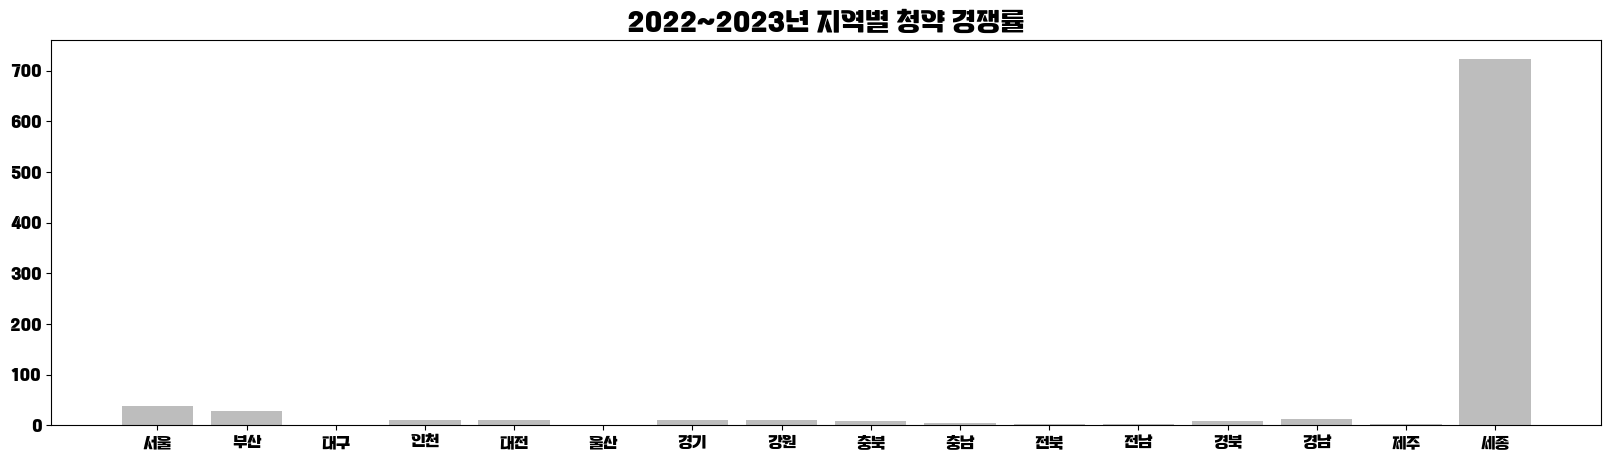

In [52]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

fe = font_manager.FontEntry(
    fname=r'C:\Users\KDP-26-\AppData\Local\Microsoft\Windows\Fonts\TENADA.ttf', # ttf 파일이 저장되어 있는 경로
    name='TENADA')                        # 이 폰트의 원하는 이름 설정
font_manager.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'TENADA'}) # 폰트 설정

plt.figure(figsize=(20,5))

# 대구만 색 다르게
a='#BDBDBD'
b='#DF0101'
color=[a,a,b,a,a,a,a,a,a,a,a,a,a,a,a]
idx=['서울','부산','대구','인천','대전','울산','경기','강원','충북','충남','전북','전남','경북','경남','제주','세종']

plt.bar(ratio.index,ratio['일반공급 경쟁률'],color=color)
plt.xticks(rotation=0)
plt.title('2022~2023년 지역별 청약 경쟁률', size=20)
plt.show()

In [53]:
ratio_exc_sejong=ratio['서울':'제주']
ratio_exc_sejong

,일반공급 경쟁률
시도,
서울,38.207857
부산,27.807857
대구,0.766923
인천,9.593529
대전,10.455000
울산,1.505000
경기,9.749444
강원,11.079000
충북,9.143571


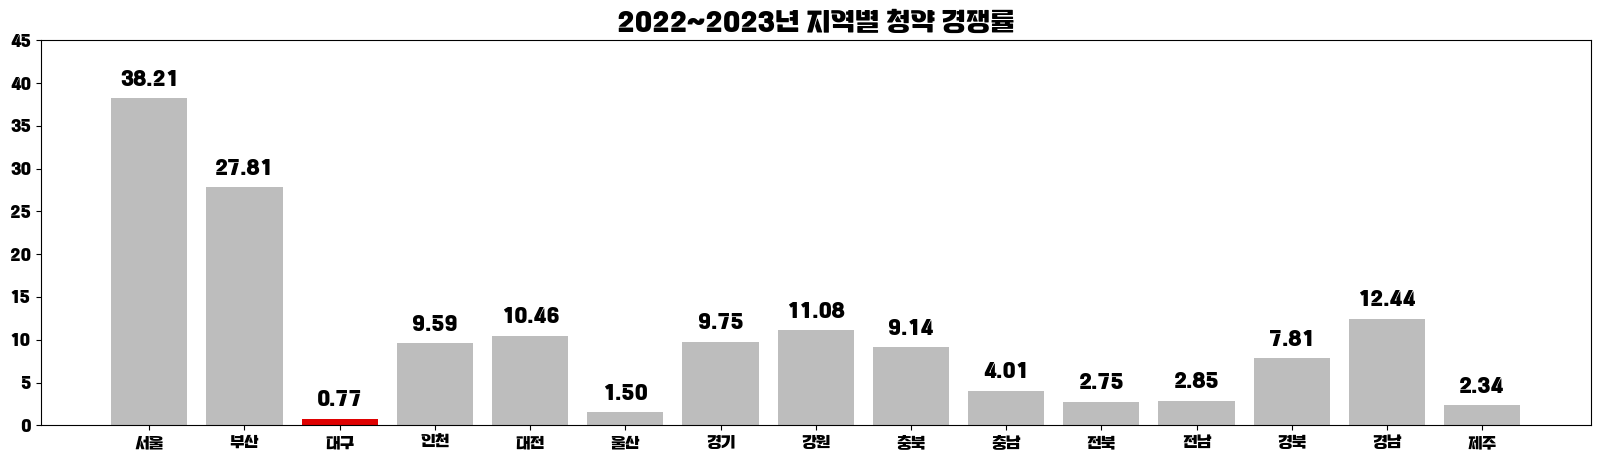

In [54]:

plt.figure(figsize=(20,5))

# 대구만 색 다르게
a='#BDBDBD'
b='#DF0101'
color=[a,a,b,a,a,a,a,a,a,a,a,a,a,a,a]
idx=['서울','부산','대구','인천','대전','울산','경기','강원','충북','충남','전북','전남','경북','경남','제주']

plt.bar(ratio_exc_sejong.index,ratio_exc_sejong['일반공급 경쟁률'],color=color)
plt.xticks(rotation=0)
plt.title('2022~2023년 지역별 청약 경쟁률', size=20)
plt.ylim(0,45)

# 데이터 레이블 표시하기
for i, v in enumerate(ratio_exc_sejong['일반공급 경쟁률']):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', size=15)

plt.show()